In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv'
import pandas as pd
sp500_df = pd.io.parsers.read_csv(url)
sp500_list = sp500_df['Symbol'].to_list()
print(len(sp500_list))

505


In [3]:
!pip install alpha_vantage

     |████████████████████████████████| 1.1 MB 6.2 MB/s 
     |████████████████████████████████| 271 kB 44.0 MB/s 
     |████████████████████████████████| 160 kB 46.8 MB/s 
     |████████████████████████████████| 192 kB 49.8 MB/s 


In [4]:
API_KEY_AV = '.'
from alpha_vantage.timeseries import TimeSeries
# For the default date string index behavior
ts = TimeSeries(key=API_KEY_AV,output_format='pandas', indexing_type='date')


In [5]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df=payload[0]
print(df.columns)

Index(['Symbol', 'Security', 'SEC filings', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date first added', 'CIK', 'Founded'],
      dtype='object')


In [6]:
sectors=df['GICS Sector'].values.tolist()
sectors=set(sectors)
sectors

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

In [7]:
for sector in sectors:
  df2=df[df['GICS Sector']==sector]
  inds=df2['GICS Sub-Industry'].values.tolist()
  ins=set(inds)
  print(sector,len(list(inds)),inds)

Health Care 64 ['Health Care Equipment', 'Pharmaceuticals', 'Health Care Equipment', 'Health Care Equipment', 'Health Care Supplies', 'Health Care Distributors', 'Biotechnology', 'Managed Health Care', 'Health Care Equipment', 'Health Care Equipment', 'Life Sciences Tools & Services', 'Life Sciences Tools & Services', 'Biotechnology', 'Health Care Equipment', 'Health Care Distributors', 'Health Care Distributors', 'Pharmaceuticals', 'Managed Health Care', 'Health Care Technology', 'Life Sciences Tools & Services', 'Managed Health Care', 'Health Care Supplies', 'Health Care Services', 'Health Care Equipment', 'Health Care Facilities', 'Health Care Supplies', 'Health Care Equipment', 'Health Care Equipment', 'Biotechnology', 'Health Care Facilities', 'Health Care Distributors', 'Health Care Equipment', 'Managed Health Care', 'Health Care Equipment', 'Life Sciences Tools & Services', 'Biotechnology', 'Health Care Equipment', 'Life Sciences Tools & Services', 'Pharmaceuticals', 'Health Car

In [8]:
mySector='Energy'
df2=df[df['GICS Sector']==mySector]
energy_sb=df2['Symbol']
df2

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
43,APA,APA Corporation,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
58,BKR,Baker Hughes,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",2017-07-07,1701605,2017
104,CVX,Chevron,reports,Energy,Integrated Oil & Gas,"San Ramon, California",1957-03-04,93410,1879
124,COP,ConocoPhillips,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1957-03-04,1163165,2002
132,CTRA,Coterra,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2008-06-23,858470,2021 (1989)
144,DVN,Devon Energy,reports,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,1090012,1971
146,FANG,Diamondback Energy,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2018-12-03,1539838,2007
173,EOG,EOG Resources,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2000-11-02,821189,1999
188,XOM,ExxonMobil,reports,Energy,Integrated Oil & Gas,"Irving, Texas",1957-03-04,34088,1999
222,HAL,Halliburton,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",1957-03-04,45012,1919


In [9]:
energy_sb

43      APA
58      BKR
104     CVX
124     COP
132    CTRA
144     DVN
146    FANG
173     EOG
188     XOM
222     HAL
230     HES
275     KMI
298     MRO
299     MPC
353     OXY
356     OKE
373     PSX
375     PXD
412     SLB
466     VLO
494     WMB
Name: Symbol, dtype: object

In [10]:
df2['GICS Sub-Industry'].unique() ## 5개의 하위 산업 존재

array(['Oil & Gas Exploration & Production',
       'Oil & Gas Equipment & Services', 'Integrated Oil & Gas',
       'Oil & Gas Storage & Transportation',
       'Oil & Gas Refining & Marketing'], dtype=object)

In [12]:
df2['GICS Sub-Industry']## Energy 하위 산업 

43     Oil & Gas Exploration & Production
58         Oil & Gas Equipment & Services
104                  Integrated Oil & Gas
124    Oil & Gas Exploration & Production
132    Oil & Gas Exploration & Production
144    Oil & Gas Exploration & Production
146    Oil & Gas Exploration & Production
173    Oil & Gas Exploration & Production
188                  Integrated Oil & Gas
222        Oil & Gas Equipment & Services
230                  Integrated Oil & Gas
275    Oil & Gas Storage & Transportation
298    Oil & Gas Exploration & Production
299        Oil & Gas Refining & Marketing
353    Oil & Gas Exploration & Production
356    Oil & Gas Storage & Transportation
373        Oil & Gas Refining & Marketing
375    Oil & Gas Exploration & Production
412        Oil & Gas Equipment & Services
466        Oil & Gas Refining & Marketing
494    Oil & Gas Storage & Transportation
Name: GICS Sub-Industry, dtype: object

In [52]:
stockReturnDict = {}
stockReturnDF = pd.DataFrame()
meta_data = {}
import time
tickerList = list(energy_sb)
for ticker in tickerList:
  

  try:
    print(ticker)
    stockReturnDict[ticker], meta_data[ticker] = ts.get_daily_adjusted(symbol=ticker, outputsize= 'full')
    stockReturnDict[ticker].sort_values('date')
    stockReturnDict[ticker]['ticker'] = ticker
    
    stockReturnDF = pd.concat([stockReturnDF, stockReturnDict[ticker]], axis=0)
    stockReturnDF.head()
  except:
    print(ticker,'오류')
    pass
  time.sleep(12)  ## 1분에 5번 가져올 수 있어서 시간 걸어야됨 

APA
BKR
CVX
COP
CTRA
DVN
FANG
EOG
XOM
HAL
HES
KMI
MRO
MPC
OXY
OKE
PSX
PXD
SLB
VLO
WMB


In [53]:
stockReturnDF['ticker'].unique()

array(['APA', 'BKR', 'CVX', 'COP', 'CTRA', 'DVN', 'FANG', 'EOG', 'XOM',
       'HAL', 'HES', 'KMI', 'MRO', 'MPC', 'OXY', 'OKE', 'PSX', 'PXD',
       'SLB', 'VLO', 'WMB'], dtype=object)

In [54]:
pip install yfinance

In [55]:
import yfinance as yf

In [56]:
stockReturnDF['ticker'].unique()

array(['APA', 'BKR', 'CVX', 'COP', 'CTRA', 'DVN', 'FANG', 'EOG', 'XOM',
       'HAL', 'HES', 'KMI', 'MRO', 'MPC', 'OXY', 'OKE', 'PSX', 'PXD',
       'SLB', 'VLO', 'WMB'], dtype=object)

In [57]:
APA=yf.Ticker('APA')

In [58]:
APA.info['marketCap']

8856619008

In [59]:
marketcap=list(stockReturnDF['ticker'].unique())

In [60]:
data=[]
for company in marketcap:

  data.append(yf.Ticker(company).info['marketCap'])

In [61]:
df2['marketcap']=data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df2['marketcap'].mean() ##평균 

50324072545.52381

In [63]:
df2['marketcap'].median() ##중간 

28082946048.0

In [64]:
df2['marketcap'].max()##최대 시총

254141202432

In [65]:
df2['marketcap'].min()##최소 시총 

8856619008

In [28]:
df2.to_csv('outline.csv')
##df2=pd.read_csv('outline.csv')

In [66]:
df2

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,marketcap
43,APA,APA Corporation,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954,8856619008
58,BKR,Baker Hughes,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",2017-07-07,1701605,2017,20600842240
104,CVX,Chevron,reports,Energy,Integrated Oil & Gas,"San Ramon, California",1957-03-04,93410,1879,218985578496
124,COP,ConocoPhillips,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1957-03-04,1163165,2002,90493157376
132,CTRA,Coterra,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2008-06-23,858470,2021 (1989),15994943488
144,DVN,Devon Energy,reports,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,1090012,1971,26538399744
146,FANG,Diamondback Energy,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2018-12-03,1539838,2007,18557755392
173,EOG,EOG Resources,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2000-11-02,821189,1999,49147559936
188,XOM,ExxonMobil,reports,Energy,Integrated Oil & Gas,"Irving, Texas",1957-03-04,34088,1999,254141202432
222,HAL,Halliburton,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",1957-03-04,45012,1919,19791015936


In [67]:
df3=df2.groupby(['Symbol','GICS Sub-Industry'])['marketcap'].sum()

In [69]:
df3

Symbol  GICS Sub-Industry                 
APA     Oil & Gas Exploration & Production      8856619008
BKR     Oil & Gas Equipment & Services         20600842240
COP     Oil & Gas Exploration & Production     90493157376
CTRA    Oil & Gas Exploration & Production     15994943488
CVX     Integrated Oil & Gas                  218985578496
DVN     Oil & Gas Exploration & Production     26538399744
EOG     Oil & Gas Exploration & Production     49147559936
FANG    Oil & Gas Exploration & Production     18557755392
HAL     Oil & Gas Equipment & Services         19791015936
HES     Integrated Oil & Gas                   22182649856
KMI     Oil & Gas Storage & Transportation     35371909120
MPC     Oil & Gas Refining & Marketing         38443470848
MRO     Oil & Gas Exploration & Production     11794835456
OKE     Oil & Gas Storage & Transportation     25797453824
OXY     Oil & Gas Exploration & Production     26188828672
PSX     Oil & Gas Refining & Marketing         31462903808
PXD     Oil &

In [70]:
stockReturnDF

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,ticker
date,,,,,,,,,
2021-12-17,24.310,24.925,23.940,24.38,24.380000,16749596.0,0.0,1.0,APA
2021-12-16,25.550,25.840,24.555,24.79,24.790000,8682236.0,0.0,1.0,APA
2021-12-15,24.855,25.225,23.670,25.10,25.100000,7724597.0,0.0,1.0,APA
2021-12-14,24.790,25.710,24.650,24.95,24.950000,7080145.0,0.0,1.0,APA
2021-12-13,26.340,26.580,25.160,25.28,25.280000,10501594.0,0.0,1.0,APA
...,...,...,...,...,...,...,...,...,...
1999-11-05,35.530,36.090,34.480,34.73,11.828663,2316900.0,0.0,1.0,WMB
1999-11-04,36.220,36.590,35.290,35.66,12.145411,2580700.0,0.0,1.0,WMB
1999-11-03,36.460,36.770,35.290,35.66,12.145411,3178600.0,0.0,1.0,WMB


In [71]:
stockReturnDF

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,ticker
date,,,,,,,,,
2021-12-17,24.310,24.925,23.940,24.38,24.380000,16749596.0,0.0,1.0,APA
2021-12-16,25.550,25.840,24.555,24.79,24.790000,8682236.0,0.0,1.0,APA
2021-12-15,24.855,25.225,23.670,25.10,25.100000,7724597.0,0.0,1.0,APA
2021-12-14,24.790,25.710,24.650,24.95,24.950000,7080145.0,0.0,1.0,APA
2021-12-13,26.340,26.580,25.160,25.28,25.280000,10501594.0,0.0,1.0,APA
...,...,...,...,...,...,...,...,...,...
1999-11-05,35.530,36.090,34.480,34.73,11.828663,2316900.0,0.0,1.0,WMB
1999-11-04,36.220,36.590,35.290,35.66,12.145411,2580700.0,0.0,1.0,WMB
1999-11-03,36.460,36.770,35.290,35.66,12.145411,3178600.0,0.0,1.0,WMB


In [72]:
stockReturnDF = stockReturnDF.sort_values(['ticker','date'])

stockReturnDF['ret']  =  (stockReturnDF['5. adjusted close']-stockReturnDF['5. adjusted close'].shift(1))/stockReturnDF['5. adjusted close'].shift(1)
stockReturnDF['lnReturns']  = np.log(stockReturnDF['5. adjusted close']/stockReturnDF['5. adjusted close'].shift(1))

stockReturnDF.loc[stockReturnDF['ticker'] != stockReturnDF['ticker'].shift(1), 'lnReturns'] = np.NaN
stockReturnDF.loc[stockReturnDF['ticker'] != stockReturnDF['ticker'].shift(1), 'ret'] = np.NaN

stockReturnDF['date'] = stockReturnDF.index

stockReturnDF['YearMonth'] = stockReturnDF['date'].map(lambda x: str(x)[:4] + str(x)[5:7])

In [73]:
stockReturnDF

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,ticker,ret,lnReturns,date,YearMonth
date,,,,,,,,,,,,,
1999-11-01,38.75,40.500,38.56,39.94,13.331093,1133400.0,0.0,1.0,APA,NaN,NaN,1999-11-01,199911
1999-11-02,40.00,40.250,39.25,39.31,13.120813,754300.0,0.0,1.0,APA,-0.015774,-0.015899,1999-11-02,199911
1999-11-03,39.50,39.500,38.88,39.06,13.037368,1080000.0,0.0,1.0,APA,-0.006360,-0.006380,1999-11-03,199911
1999-11-04,39.25,39.250,38.56,38.75,12.933897,636400.0,0.0,1.0,APA,-0.007937,-0.007968,1999-11-04,199911
1999-11-05,38.94,39.190,37.38,37.63,12.560066,1381100.0,0.0,1.0,APA,-0.028903,-0.029329,1999-11-05,199911
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,62.47,62.720,61.35,61.63,61.630000,17793708.0,0.0,1.0,XOM,-0.021901,-0.022145,2021-12-13,202112
2021-12-14,61.26,62.465,61.22,61.54,61.540000,22551145.0,0.0,1.0,XOM,-0.001460,-0.001461,2021-12-14,202112
2021-12-15,61.19,61.500,60.01,61.27,61.270000,19961862.0,0.0,1.0,XOM,-0.004387,-0.004397,2021-12-15,202112


In [74]:
monthlyStockReturns = stockReturnDF.groupby(['ticker', 'YearMonth'])['lnReturns'].sum()
monthlyStockReturns

ticker  YearMonth
APA     199911      -1.091511e-01
        199912       3.271508e-02
        200001      -1.198271e-02
        200002      -9.714451e-17
        200003       3.109749e-01
                         ...     
XOM     202108      -3.937790e-02
        202109       7.591433e-02
        202110       9.171807e-02
        202111      -6.090949e-02
        202112       3.170104e-03
Name: lnReturns, Length: 4796, dtype: float64

In [75]:
monthlyStockReturnsDF  = monthlyStockReturns.to_frame()
monthlyStockReturnsDF['ticker'] = monthlyStockReturnsDF.index.get_level_values('ticker')

In [76]:
monthlyStockReturnsDF

lnReturns ticker
ticker YearMonth                     
APA    199911    -1.091511e-01    APA
       199912     3.271508e-02    APA
       200001    -1.198271e-02    APA
       200002    -9.714451e-17    APA
       200003     3.109749e-01    APA
...                        ...    ...
XOM    202108    -3.937790e-02    XOM
       202109     7.591433e-02    XOM
       202110     9.171807e-02    XOM
       202111    -6.090949e-02    XOM
       202112     3.170104e-03    XOM

[4796 rows x 2 columns]

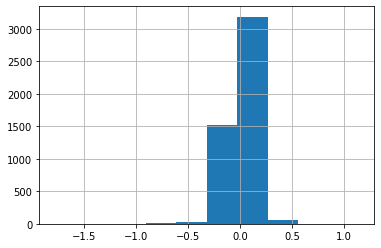

In [77]:
monthlyStockReturnsDF['lnReturns'].hist()

In [78]:
stockReturnDF['Year'] = stockReturnDF['YearMonth'].map(lambda x: str(x)[:4])

In [79]:
stockReturnDF

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,ticker,ret,lnReturns,date,YearMonth,Year
date,,,,,,,,,,,,,,
1999-11-01,38.75,40.500,38.56,39.94,13.331093,1133400.0,0.0,1.0,APA,NaN,NaN,1999-11-01,199911,1999
1999-11-02,40.00,40.250,39.25,39.31,13.120813,754300.0,0.0,1.0,APA,-0.015774,-0.015899,1999-11-02,199911,1999
1999-11-03,39.50,39.500,38.88,39.06,13.037368,1080000.0,0.0,1.0,APA,-0.006360,-0.006380,1999-11-03,199911,1999
1999-11-04,39.25,39.250,38.56,38.75,12.933897,636400.0,0.0,1.0,APA,-0.007937,-0.007968,1999-11-04,199911,1999
1999-11-05,38.94,39.190,37.38,37.63,12.560066,1381100.0,0.0,1.0,APA,-0.028903,-0.029329,1999-11-05,199911,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,62.47,62.720,61.35,61.63,61.630000,17793708.0,0.0,1.0,XOM,-0.021901,-0.022145,2021-12-13,202112,2021
2021-12-14,61.26,62.465,61.22,61.54,61.540000,22551145.0,0.0,1.0,XOM,-0.001460,-0.001461,2021-12-14,202112,2021
2021-12-15,61.19,61.500,60.01,61.27,61.270000,19961862.0,0.0,1.0,XOM,-0.004387,-0.004397,2021-12-15,202112,2021


In [105]:
yearStockReturns = stockReturnDF.groupby(['ticker', 'Year'])['lnReturns'].sum()
yearStockReturns

ticker  Year
APA     1999   -0.076436
        2000    0.643911
        2001   -0.224905
        2002    0.140864
        2003    0.410626
                  ...   
XOM     2017   -0.038709
        2018   -0.163716
        2019    0.070008
        2020   -0.449623
        2021    0.436017
Name: lnReturns, Length: 415, dtype: float64

In [84]:
stockReturnDF.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient', 'ticker',
       'ret', 'lnReturns', 'date', 'YearMonth', 'Year'],
      dtype='object')

In [85]:
variable=stockReturnDF['2. high']-stockReturnDF['3. low']

In [127]:
stockReturnDF['variable']=(stockReturnDF['2. high']-stockReturnDF['3. low'])/stockReturnDF['5. adjusted close']

In [128]:
stockReturnDF

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,ticker,ret,lnReturns,date,YearMonth,Year,variable
date,,,,,,,,,,,,,,,
1999-11-01,38.75,40.500,38.56,39.94,13.331093,1133400.0,0.0,1.0,APA,NaN,NaN,1999-11-01,199911,1999,0.145524
1999-11-02,40.00,40.250,39.25,39.31,13.120813,754300.0,0.0,1.0,APA,-0.015774,-0.015899,1999-11-02,199911,1999,0.076215
1999-11-03,39.50,39.500,38.88,39.06,13.037368,1080000.0,0.0,1.0,APA,-0.006360,-0.006380,1999-11-03,199911,1999,0.047556
1999-11-04,39.25,39.250,38.56,38.75,12.933897,636400.0,0.0,1.0,APA,-0.007937,-0.007968,1999-11-04,199911,1999,0.053348
1999-11-05,38.94,39.190,37.38,37.63,12.560066,1381100.0,0.0,1.0,APA,-0.028903,-0.029329,1999-11-05,199911,1999,0.144108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,62.47,62.720,61.35,61.63,61.630000,17793708.0,0.0,1.0,XOM,-0.021901,-0.022145,2021-12-13,202112,2021,0.022229
2021-12-14,61.26,62.465,61.22,61.54,61.540000,22551145.0,0.0,1.0,XOM,-0.001460,-0.001461,2021-12-14,202112,2021,0.020231
2021-12-15,61.19,61.500,60.01,61.27,61.270000,19961862.0,0.0,1.0,XOM,-0.004387,-0.004397,2021-12-15,202112,2021,0.024319


In [129]:
stockReturnDF['variable']

date
1999-11-01    0.145524
1999-11-02    0.076215
1999-11-03    0.047556
1999-11-04    0.053348
1999-11-05    0.144108
                ...   
2021-12-13    0.022229
2021-12-14    0.020231
2021-12-15    0.024319
2021-12-16    0.018739
2021-12-17    0.026403
Name: variable, Length: 100366, dtype: float64

In [130]:
v_StockReturns = stockReturnDF.groupby(['ticker', 'Year'])['variable'].mean()
v_StockReturns

ticker  Year
APA     1999    0.126499
        2000    0.127677
        2001    0.109576
        2002    0.074278
        2003    0.051010
                  ...   
XOM     2017    0.012642
        2018    0.021223
        2019    0.016149
        2020    0.039372
        2021    0.023934
Name: variable, Length: 415, dtype: float64

In [131]:
v_StockReturns

ticker  Year
APA     1999    0.126499
        2000    0.127677
        2001    0.109576
        2002    0.074278
        2003    0.051010
                  ...   
XOM     2017    0.012642
        2018    0.021223
        2019    0.016149
        2020    0.039372
        2021    0.023934
Name: variable, Length: 415, dtype: float64

In [132]:
import math

In [133]:
math.sqrt(stockReturnDF['lnReturns'].var())

0.026213007936667705

In [134]:
sharp_StockReturns=v_StockReturns/math.sqrt(stockReturnDF['lnReturns'].var())

In [135]:
sharp_StockReturns

ticker  Year
APA     1999    4.825812
        2000    4.870768
        2001    4.180215
        2002    2.833628
        2003    1.945987
                  ...   
XOM     2017    0.482269
        2018    0.809626
        2019    0.616061
        2020    1.501997
        2021    0.913071
Name: variable, Length: 415, dtype: float64